# Clasificación binaria

Predecir la columna quality:

* Legit: 0
* Fraud: 1

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [103]:
df = pd.read_csv('../../data/wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [104]:
df.shape

(6497, 13)

## EDAs

In [105]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [106]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

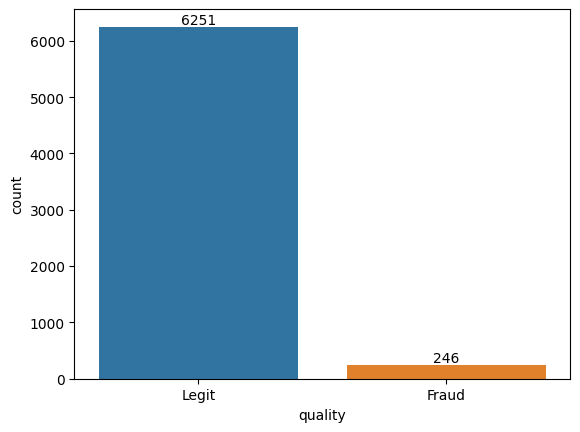

In [107]:
ax = sns.countplot(data=df, x='quality')
ax.bar_label(ax.containers[0]);

In [108]:
df['fraud'] = df['quality'].map({
    'Fraud': 1,
    'Legit': 0
})
df.drop('quality', axis=1, inplace=True)
# NOTA: drop_first permite eliminar la primera columna que se genera para evitar
# correlación entre las propias columnas de entrada
df = pd.get_dummies(df, drop_first=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,fraud,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


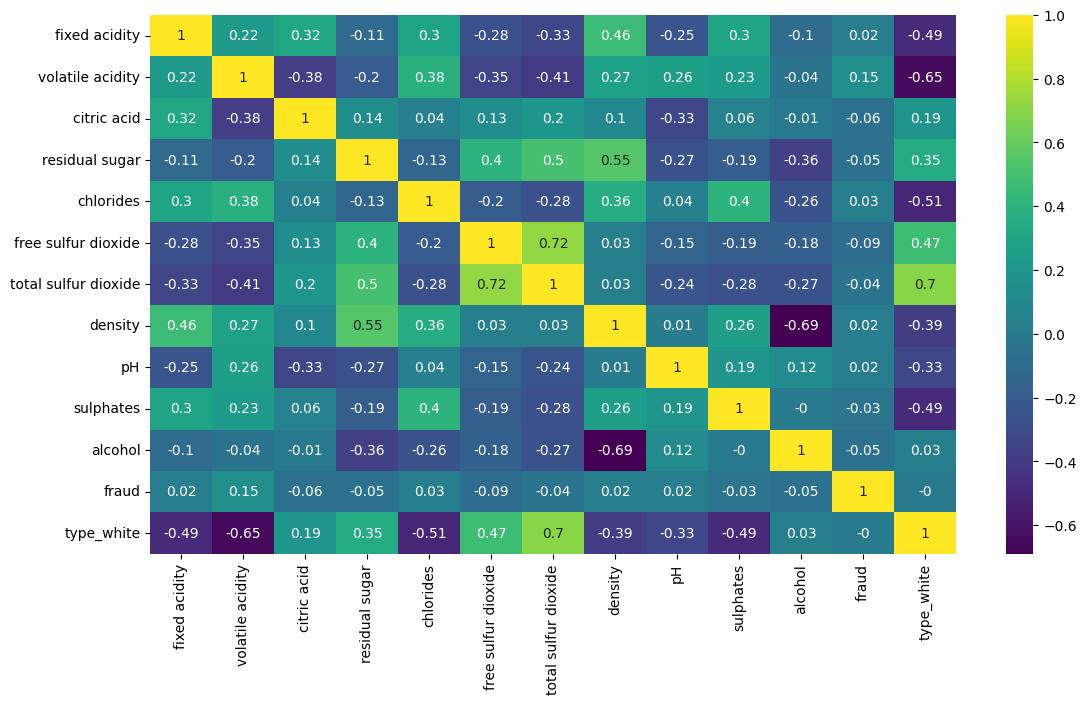

In [109]:
plt.figure(figsize=(13, 7))
df_corr = df.corr(numeric_only=True).round(2)
sns.heatmap(df_corr, cmap='viridis', annot=True);

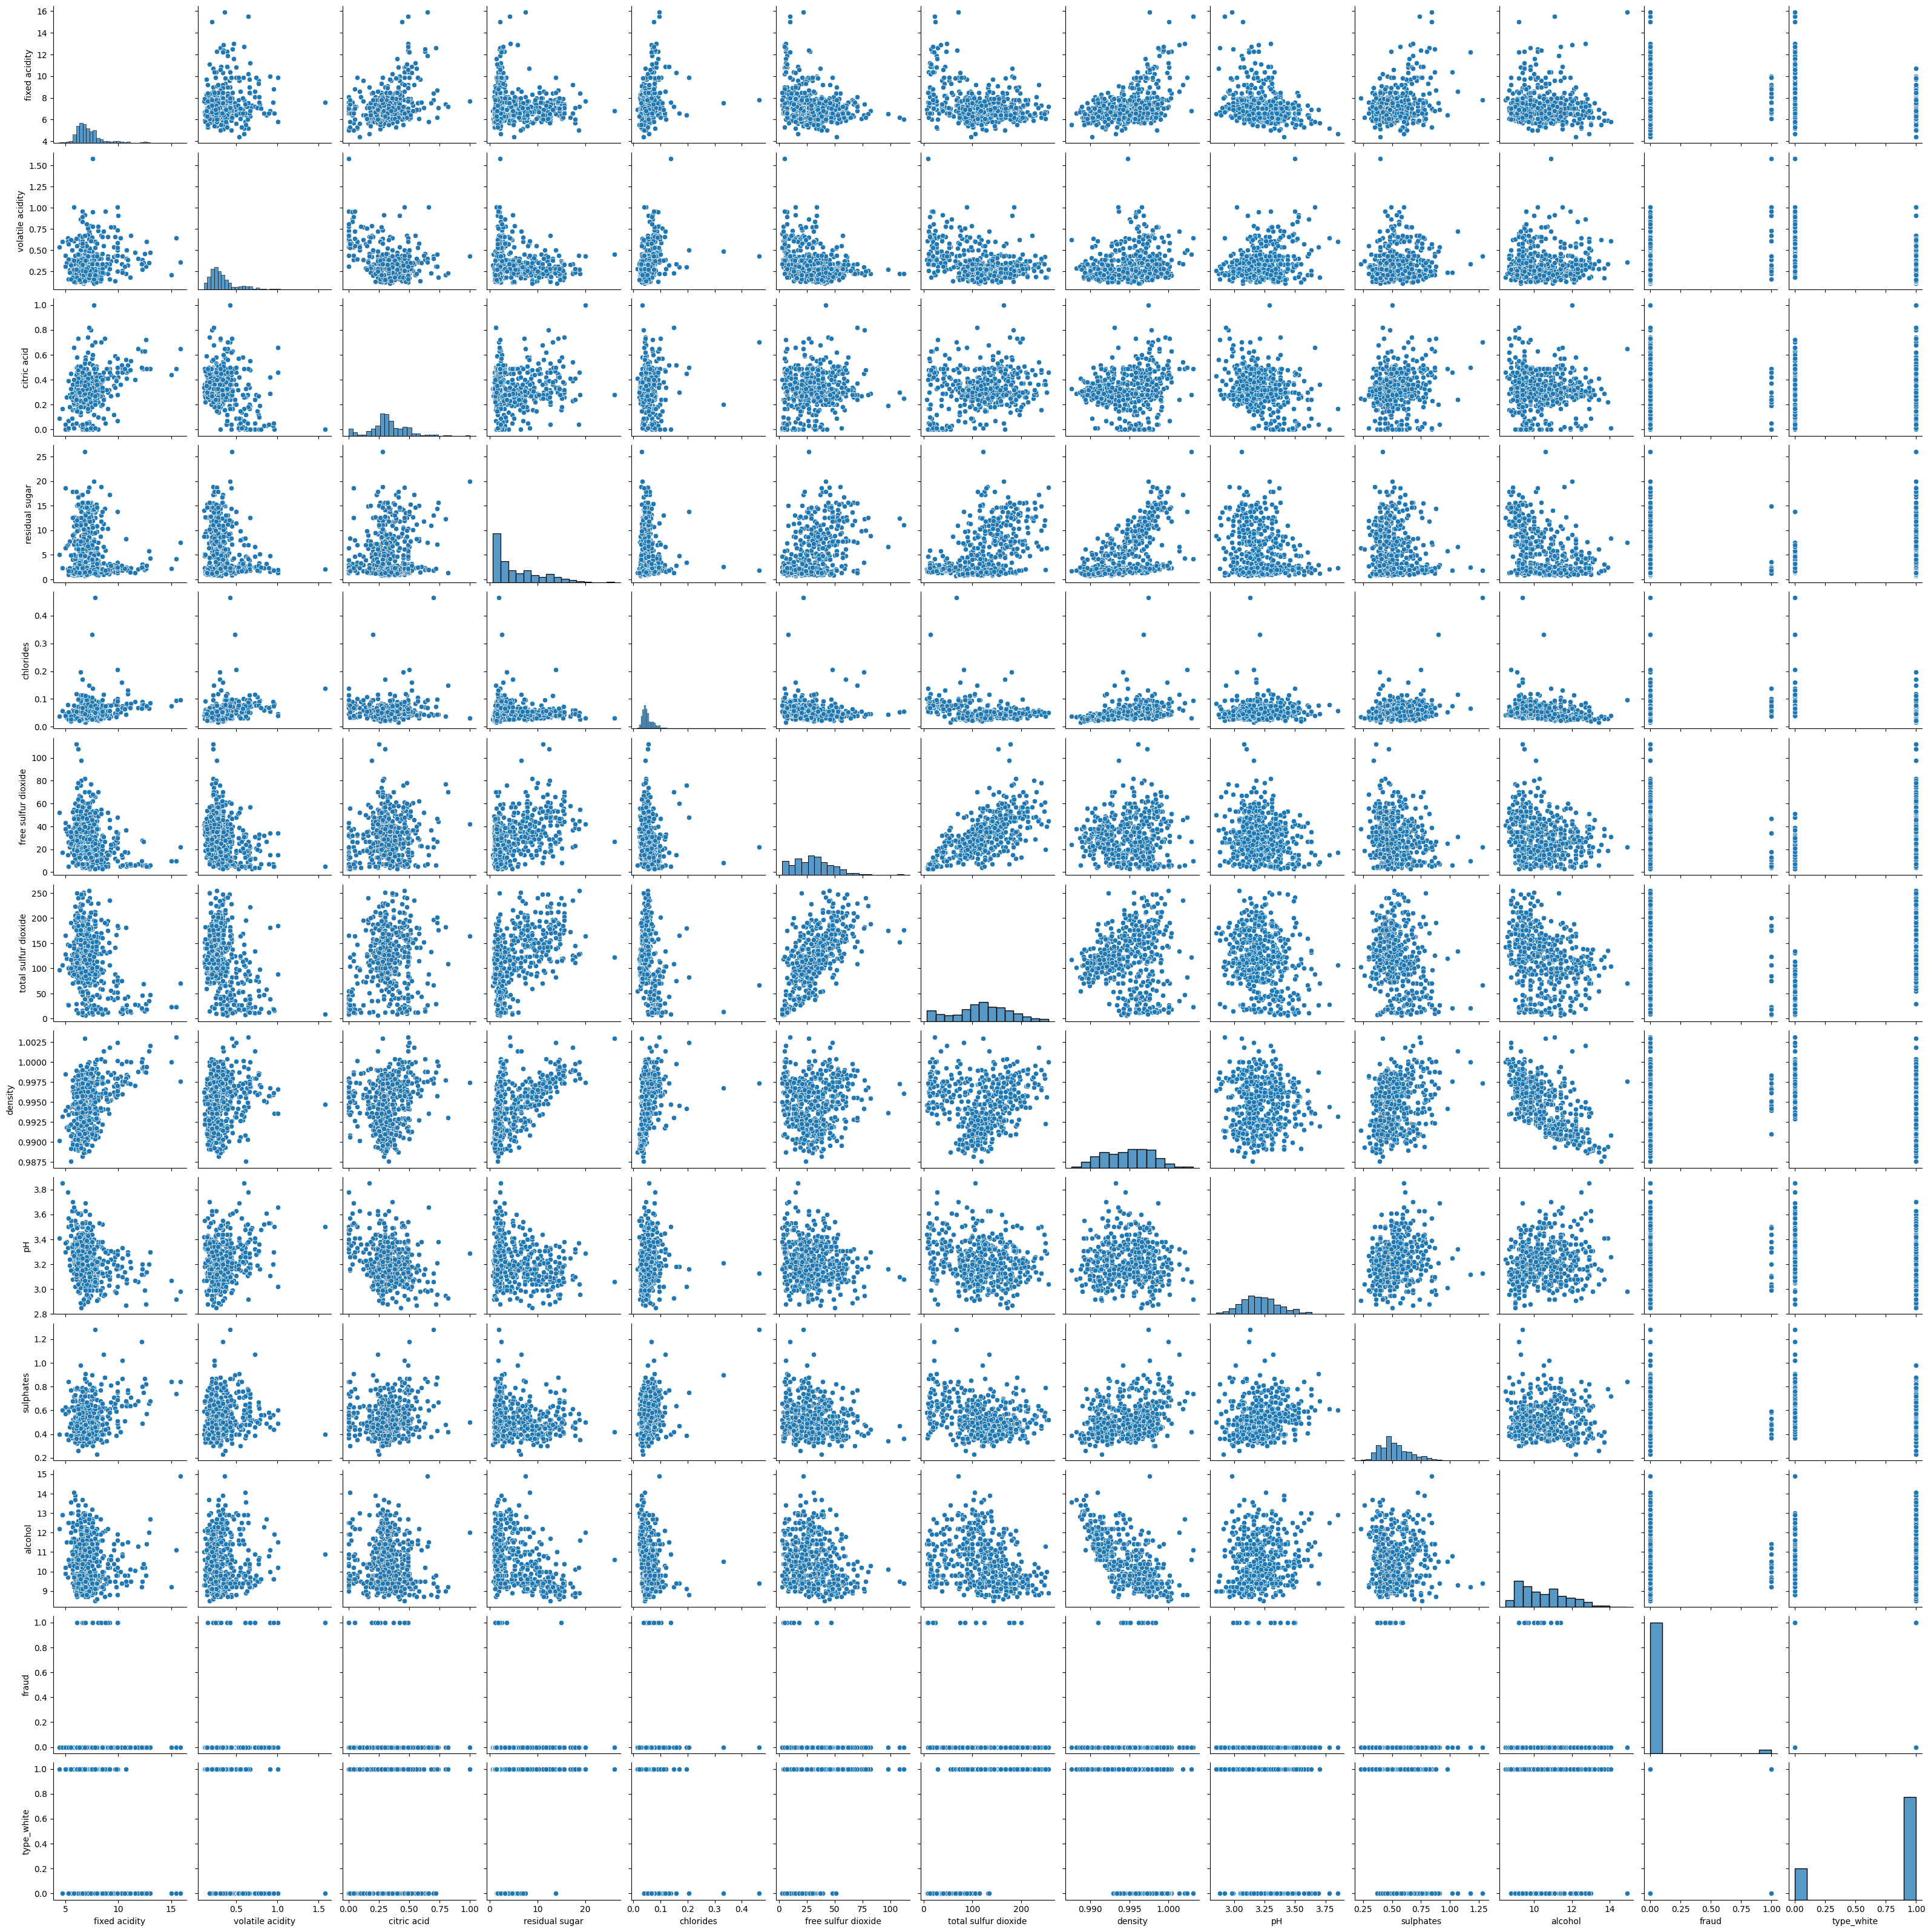

In [110]:
sns.pairplot(df.sample(500))

<Axes: xlabel='volatile acidity', ylabel='free sulfur dioxide'>

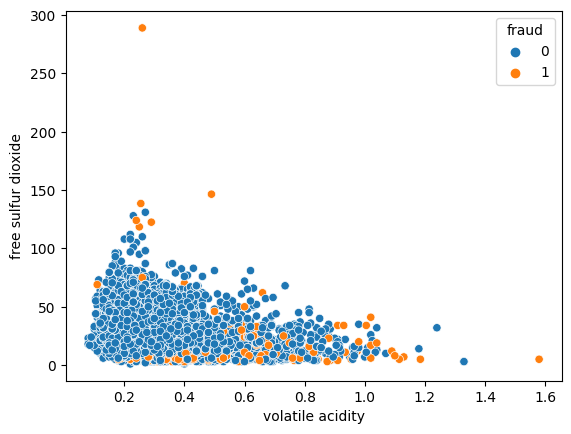

In [111]:
sns.scatterplot(data=df, x='volatile acidity', y='free sulfur dioxide', hue='fraud')

<Axes: xlabel='alcohol', ylabel='fraud'>

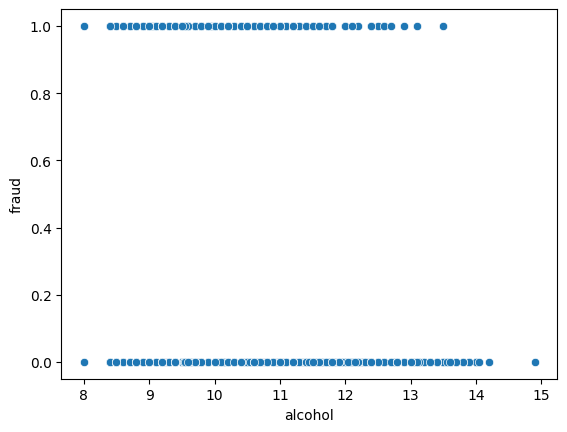

In [112]:
sns.scatterplot(data=df, x='alcohol', y='fraud')

<Axes: xlabel='fraud', ylabel='volatile acidity'>

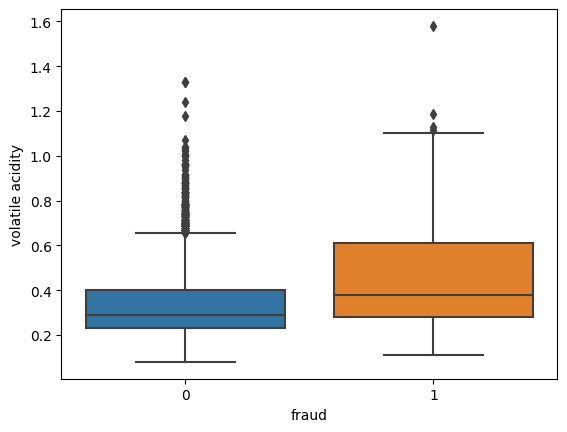

In [113]:
sns.boxplot(data=df, x='fraud', y='volatile acidity')

<Axes: xlabel='fraud', ylabel='alcohol'>

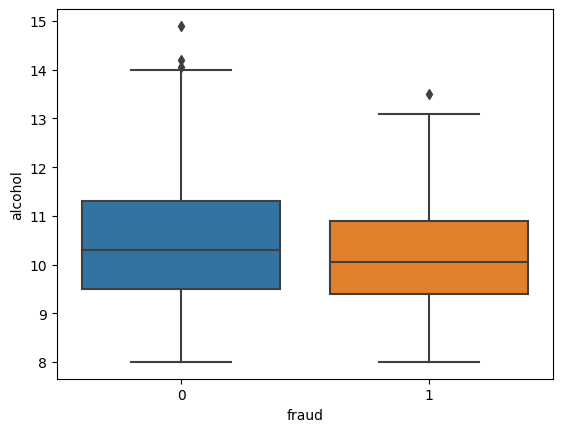

In [114]:
sns.boxplot(data=df, x='fraud', y='alcohol')

(0.0, 150.0)

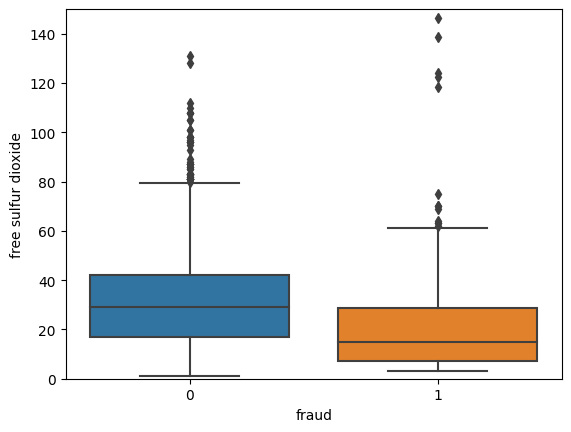

In [115]:
sns.boxplot(data=df, x='fraud', y='free sulfur dioxide')
plt.ylim(0, 150)

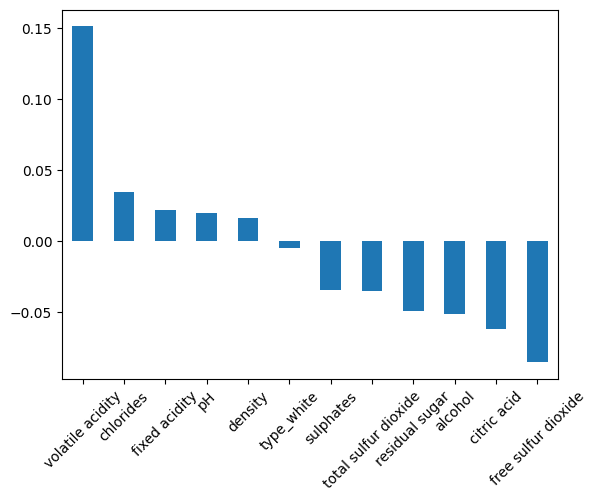

In [116]:
# Correlación con fraud ordenado descendente
df.corr(numeric_only=True)['fraud'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.xticks(rotation=45);

(0.0, 1.25)

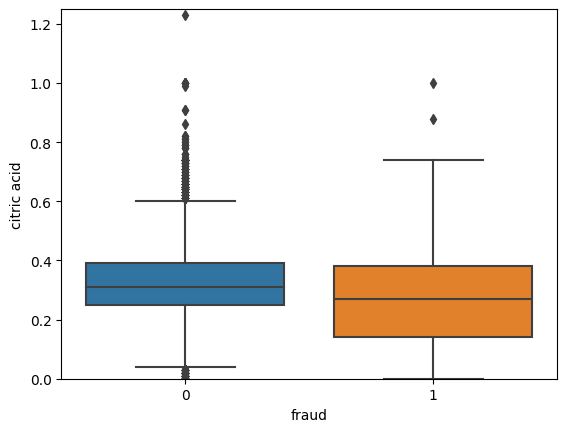

In [117]:
sns.boxplot(data=df, x='fraud', y='citric acid')
plt.ylim(0, 1.25)

<Axes: xlabel='volatile acidity', ylabel='chlorides'>

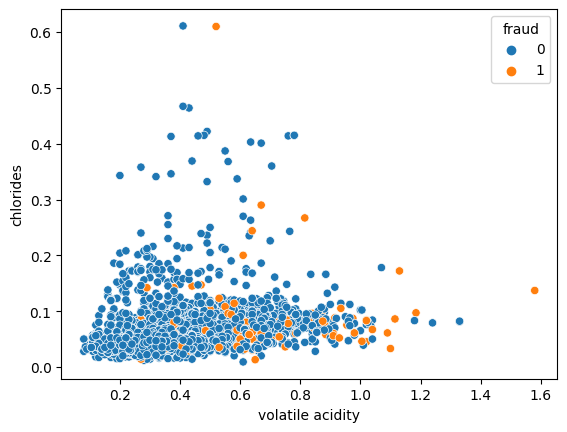

In [118]:
sns.scatterplot(data=df, x='volatile acidity', y='chlorides', hue='fraud')

## Particionamiento

In [119]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,fraud,type_white
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


In [120]:
X = df.drop('fraud', axis=1)
y = df['fraud']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Modelado base

### Regresión logística


In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       625
           1       1.00      0.04      0.08        25

    accuracy                           0.96       650
   macro avg       0.98      0.52      0.53       650
weighted avg       0.96      0.96      0.95       650



### KNN

In [166]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       625
           1       0.00      0.00      0.00        25

    accuracy                           0.96       650
   macro avg       0.48      0.50      0.49       650
weighted avg       0.92      0.96      0.94       650



c:\Users\alanj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alanj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alanj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## Balancear clases

https://imbalanced-learn.org/stable/index.html

* pip install imbalanced-learn en la consola de comandos

o

* ! pip install imbalanced-learn en una celda python de notebook y ejecutar la celda

In [139]:
from imblearn.over_sampling import SMOTE

In [167]:
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [168]:
print(f"original: {X_train.shape} {y_train.shape}")
print(f"resampled: {X_train_res.shape} {y_train_res.shape}")

original: (5847, 12) (5847,)
resampled: (11252, 12) (11252,)


In [169]:
# comprobar que se han balanceado las clases
y_train_res.value_counts()

0    5626
1    5626
Name: fraud, dtype: int64

### Regresión logística

In [170]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       625
           1       0.09      0.72      0.17        25

    accuracy                           0.72       650
   macro avg       0.54      0.72      0.50       650
weighted avg       0.95      0.72      0.81       650



### KNN

In [179]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       625
           1       0.12      0.56      0.20        25

    accuracy                           0.83       650
   macro avg       0.55      0.70      0.56       650
weighted avg       0.95      0.83      0.88       650



### SVM

https://greitemann.dev/svm-demo

In [184]:
from sklearn.svm import SVC

# model = SVC()
model = SVC(C=1000)
# Una menor C intentará tener un margen de separación más amplio lo que puede cometer más error pero generalizar mejor
# Una C mayor intentará será un margen de separación más estrecho intentando clasificar todos los puntos, no generaliza tan bien, podría dar overfitting

model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.77      0.87       625
           1       0.12      0.80      0.21        25

    accuracy                           0.77       650
   macro avg       0.56      0.79      0.54       650
weighted avg       0.96      0.77      0.84       650

